# Google Play Store Apps EDA

## Load the dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = 'googleplaystore.csv'
df = pd.read_csv(file_path)

# Perform EDA

In [2]:
# Display the first few rows
print(df.head())

# Display basic information
print(df.info())

# Display summary statistics
print(df.describe())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

### Check for missing values

In [3]:
# Check for missing values
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


###  Data Cleaning

In [4]:
# Example: Drop rows with missing values
df.dropna(inplace=True)

# Analyze user ratings

###  Distribution of user ratings

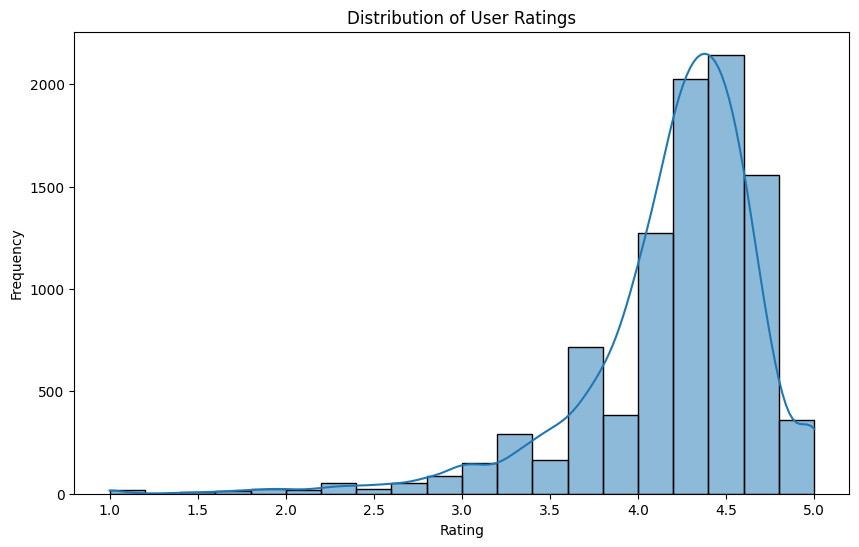

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Average rating by app category

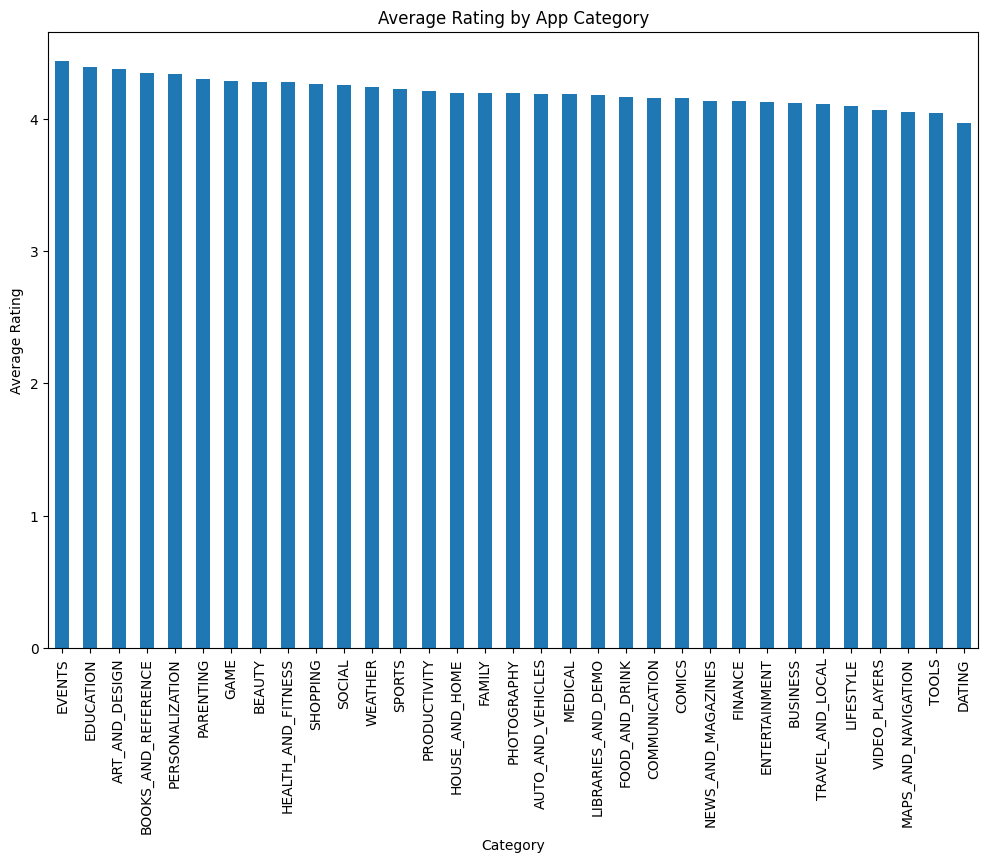

In [6]:
# Calculate average rating by category
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Plot average rating by category
plt.figure(figsize=(12, 8))
avg_rating_by_category.plot(kind='bar')
plt.title('Average Rating by App Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

# Analyze download counts

### Distribution of download counts

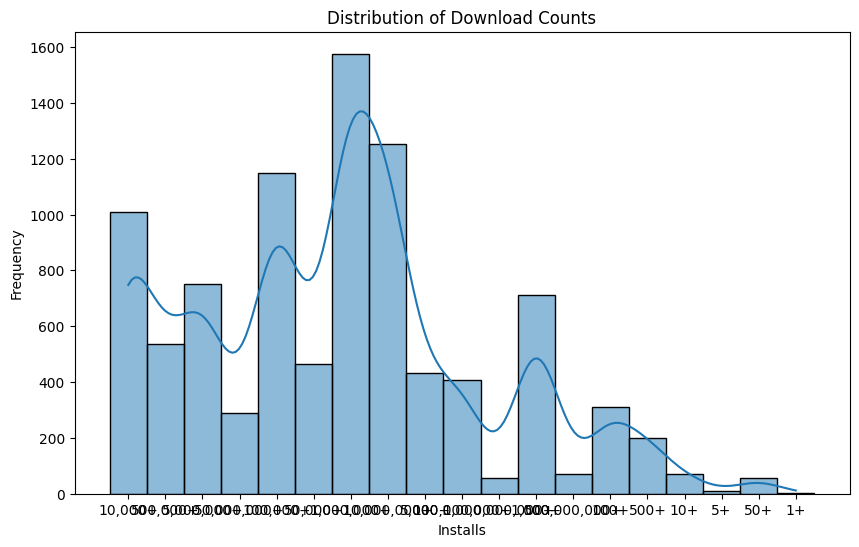

In [7]:
# Plot distribution of download counts
plt.figure(figsize=(10, 6))
sns.histplot(df['Installs'], bins=20, kde=True)
plt.title('Distribution of Download Counts')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()

### Average downloads by app category

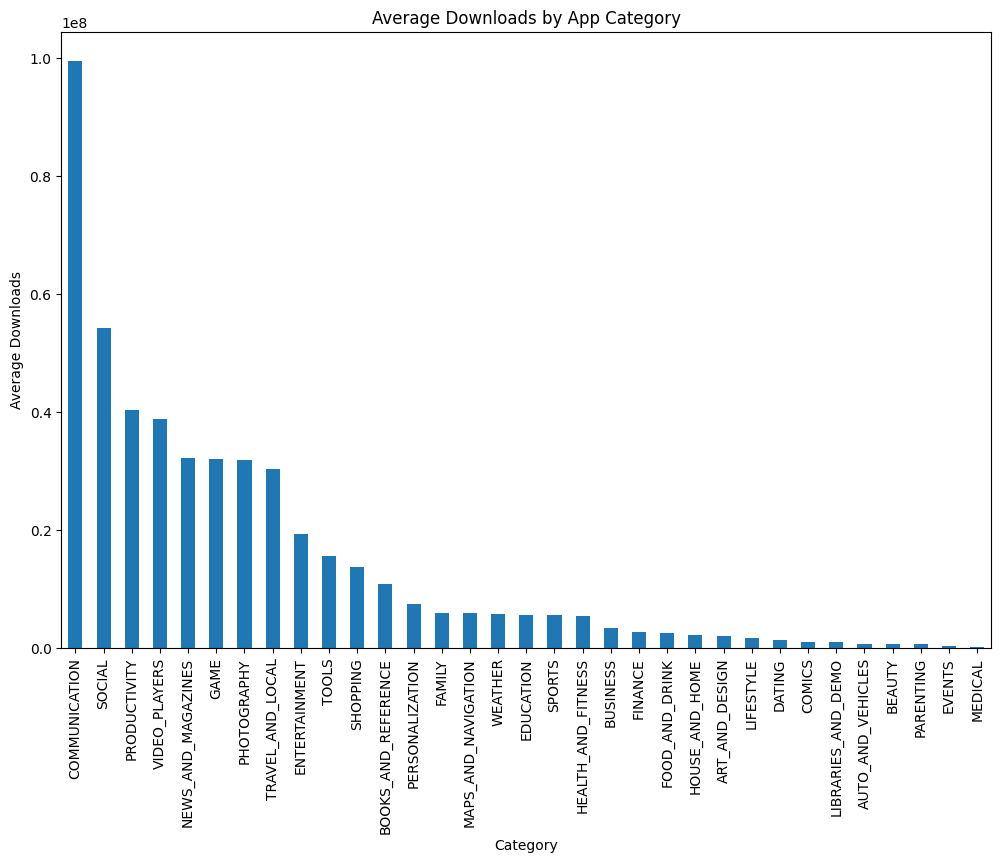

In [8]:
# Convert 'Installs' to numeric (remove commas and plus signs)
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Calculate average downloads by category
avg_downloads_by_category = df.groupby('Category')['Installs'].mean().sort_values(ascending=False)

# Plot average downloads by category
plt.figure(figsize=(12, 8))
avg_downloads_by_category.plot(kind='bar')
plt.title('Average Downloads by App Category')
plt.xlabel('Category')
plt.ylabel('Average Downloads')
plt.show()

# Analyze category successes

### Number of apps per category

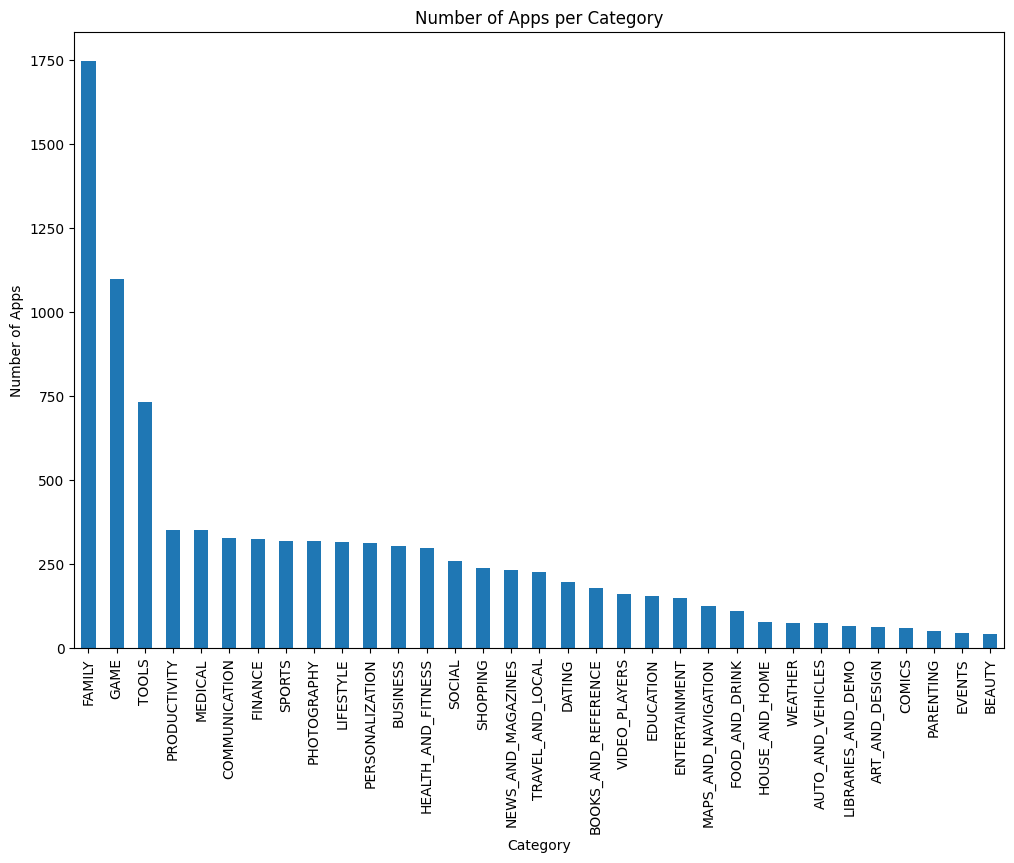

In [9]:
# Calculate number of apps per category
apps_per_category = df['Category'].value_counts()

# Plot number of apps per category
plt.figure(figsize=(12, 8))
apps_per_category.plot(kind='bar')
plt.title('Number of Apps per Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

# Analyze monetization strategies

### Free vs. Paid apps

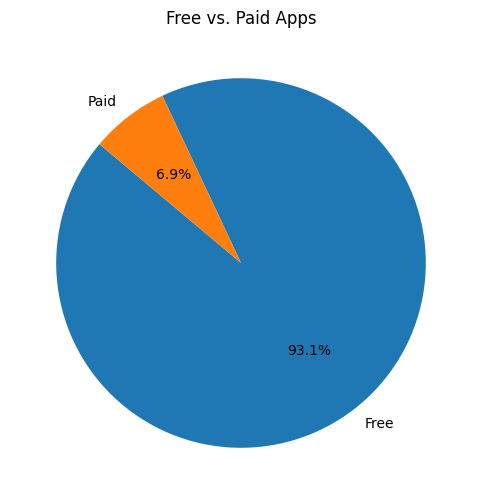

In [10]:
# Count free and paid apps
free_paid_counts = df['Type'].value_counts()

# Plot free vs. paid apps
plt.figure(figsize=(6, 6))
free_paid_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Free vs. Paid Apps')
plt.ylabel('')
plt.show()

### Average rating of free vs. paid apps

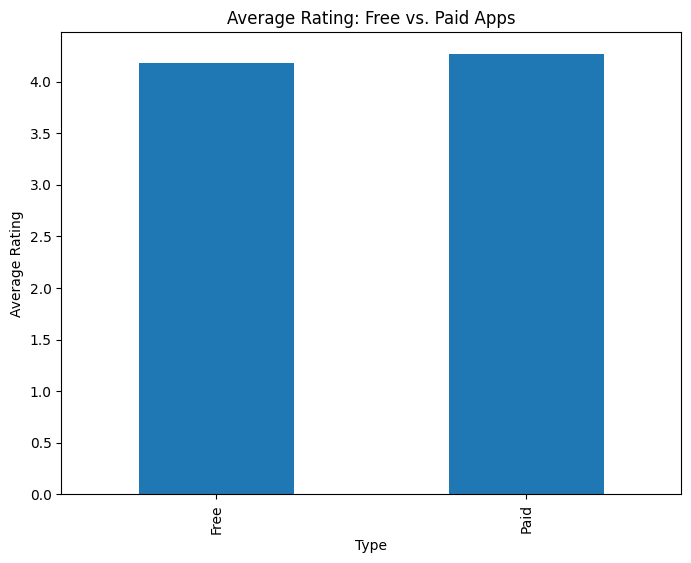

In [11]:
# Calculate average rating of free vs. paid apps
avg_rating_free_paid = df.groupby('Type')['Rating'].mean()

# Plot average rating of free vs. paid apps
plt.figure(figsize=(8, 6))
avg_rating_free_paid.plot(kind='bar')
plt.title('Average Rating: Free vs. Paid Apps')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.show()

# Analyze app pricing

### Distribution of app prices

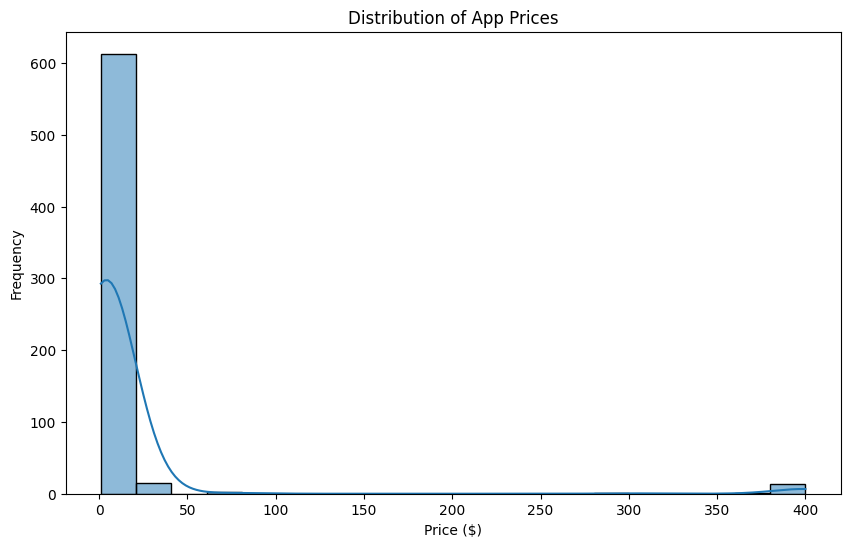

In [12]:
# Convert 'Price' to numeric (remove dollar signs)
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Plot distribution of app prices
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Price'] > 0]['Price'], bins=20, kde=True)
plt.title('Distribution of App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

### Average price by app category

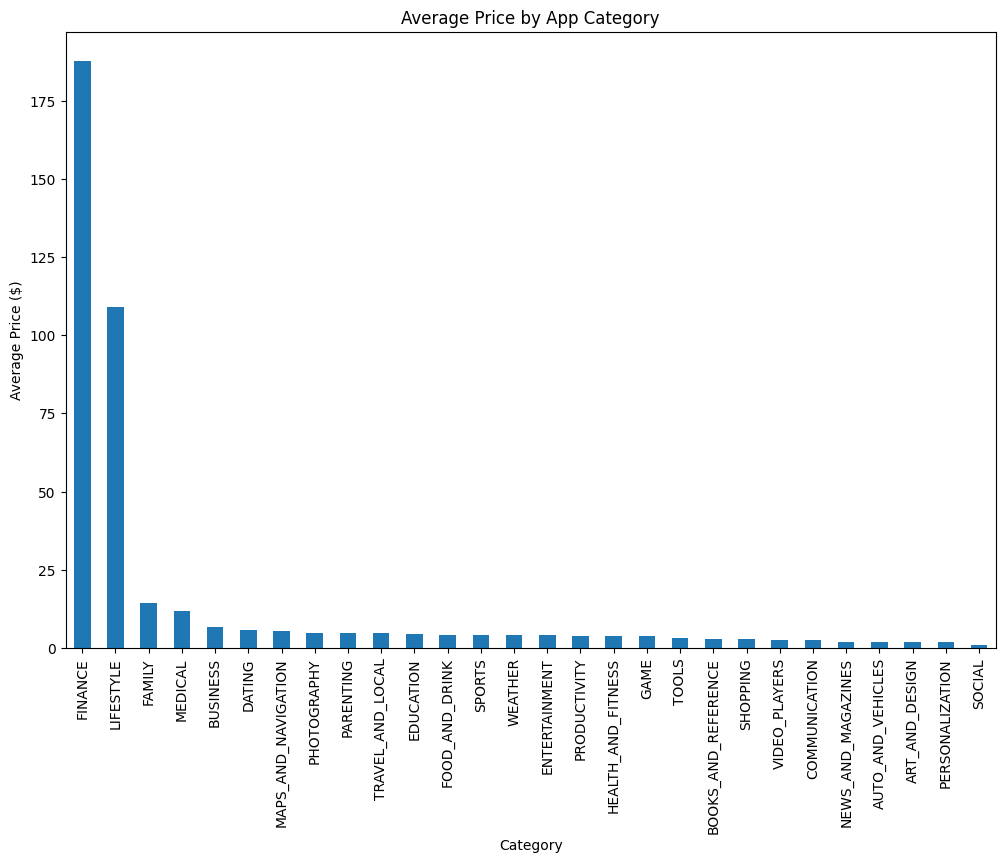

In [13]:
# Calculate average price by category
avg_price_by_category = df[df['Price'] > 0].groupby('Category')['Price'].mean().sort_values(ascending=False)

# Plot average price by category
plt.figure(figsize=(12, 8))
avg_price_by_category.plot(kind='bar')
plt.title('Average Price by App Category')
plt.xlabel('Category')
plt.ylabel('Average Price ($)')
plt.show()